# Task-5 Sales Prediction Using Python

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

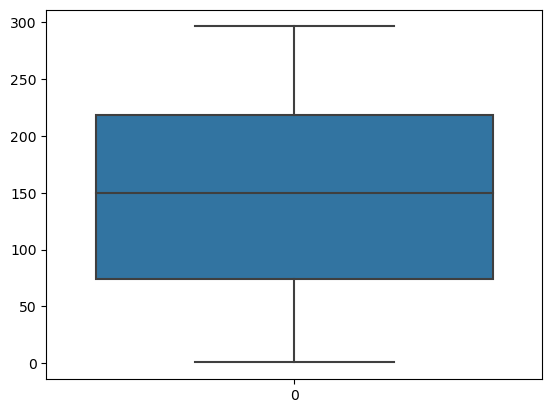

In [8]:
# outlier analysis
sns.boxplot(df['TV'])

<Axes: >

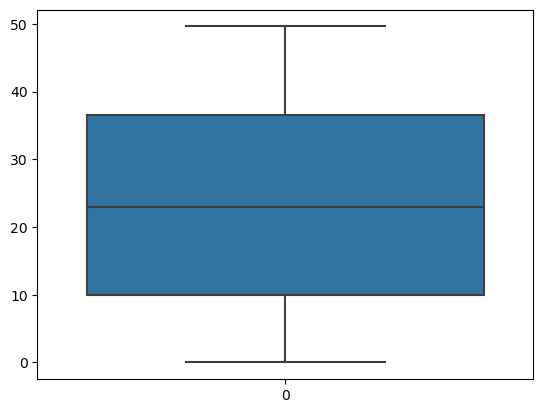

In [9]:
sns.boxplot(df['Radio'])

<Axes: >

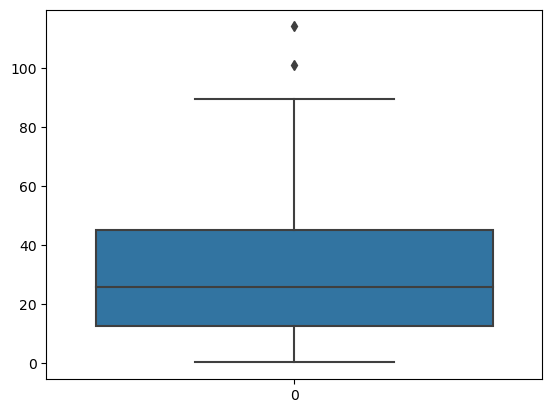

In [10]:
sns.boxplot(df['Newspaper'])

<Axes: >

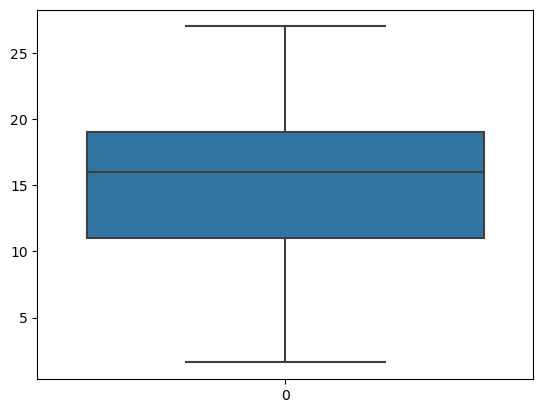

In [11]:
sns.boxplot(df['Sales'])

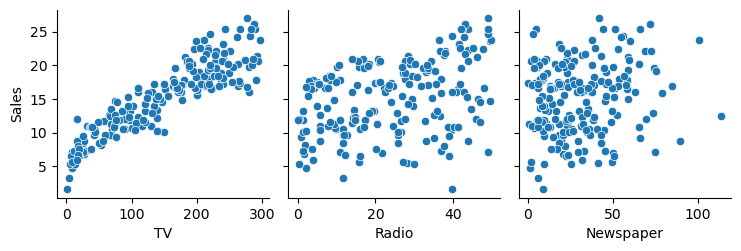

In [12]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

<Axes: >

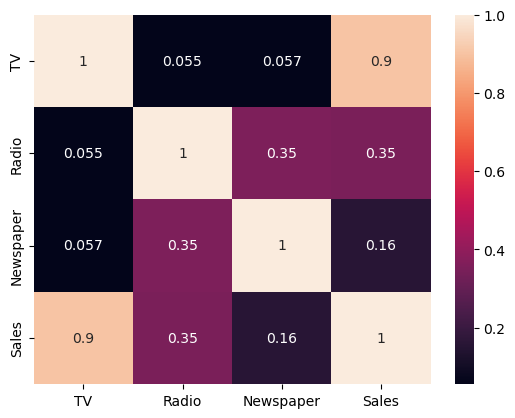

In [13]:
sns.heatmap(df.corr(),annot=True)

It can be observed that, attribute 'TV' has maximum correlation with sales

In [14]:
X = df['TV'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print("intercept:",regressor.intercept_)
print("coeffficient:",regressor.coef_)

intercept: [6.93845239]
coeffficient: [[0.05587906]]


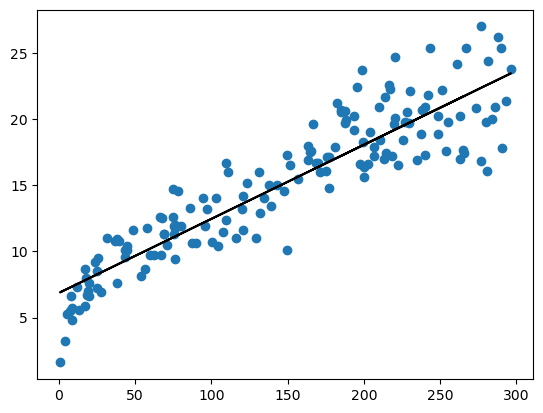

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.056*X_train+6.859,'black')

In [21]:
y_pred = regressor.predict(X_test)

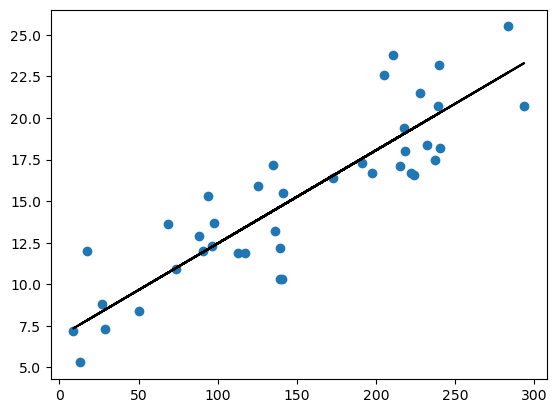

In [22]:
plt.scatter(X_test,y_test)
plt.plot(X_test,0.056*X_test+6.859,'black')

In [23]:
y_pred

array([[19.4553615 ],
       [12.38666059],
       [18.97480159],
       [14.83416336],
       [12.31401782],
       [23.34454397],
       [12.18549598],
       [14.4933011 ],
       [19.67887773],
       [ 8.53659346],
       [ 7.4246002 ],
       [10.76057999],
       [14.71681734],
       [14.73358105],
       [14.7782843 ],
       [ 9.73240531],
       [19.365955  ],
       [18.71775793],
       [22.78575339],
       [18.39365939],
       [13.96245004],
       [20.34383853],
       [20.35501434],
       [13.2471981 ],
       [13.48747805],
       [11.03997528],
       [ 7.67046805],
       [ 8.43601116],
       [11.87257326],
       [17.98015435],
       [20.20414088],
       [19.10332343],
       [14.54918016],
       [17.61694047],
       [ 7.89957219],
       [11.98991928],
       [19.14243877],
       [19.90798187],
       [20.31031109],
       [16.57758998]])

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [25]:
mean_squared_error(y_test,y_pred)

5.397170103202653

In [26]:
mean_absolute_error(y_test,y_pred)

1.8950318355776918

In [27]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.376601552947581

In [28]:
r2_score(y_test,y_pred)

0.7657010469450214